# ATL03 - Raw Photon data 

## data downloading
This data is downloaded for a section of the florida everglades.
This is an API endpoint that can be used to reproduce the dataset. 

Note:The JSON should probably be changed to netcdf

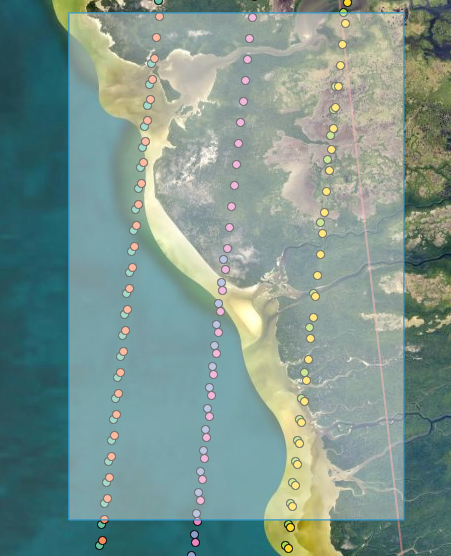


In [ ]:
api_endpoint = 'http://openaltimetry.org/data/api/icesat2/atl03?date=2021-12-12&minx=-81.23891365678568&miny=25.39587929292906&maxx=-81.12390053422709&maxy=25.56994392915953&trackId=1231&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

I predownloaded all the data for this site

## reading the data from the NetCDF

In [11]:
from netCDF4 import MFDataset,Dataset
import xarray as xr

First we can check to see the structure of the nc dataset

In [77]:
atl03_testfile = '../data/ATL03-test/224924517/processed_ATL03_20200603161425_10560701_005_01.nc'
ncds = Dataset(atl03_testfile)
print(ncds.groups.keys())
ncds.dimensions['ds_surf_type']

dict_keys(['METADATA', 'ancillary_data', 'gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r'])


<class 'netCDF4._netCDF4.Dimension'>: name = 'ds_surf_type', size = 5

In [82]:
ncds.groups['gt1l'].groups['heights']

<class 'netCDF4._netCDF4.Group'>
group /gt1l/heights:
    Description: Contains arrays of the parameters for each received photon.
    data_rate: Data are stored at the photon detection rate.
    dimensions(sizes): delta_time(93006)
    variables(dimensions): float64 delta_time(delta_time), float32 h_ph(delta_time), float64 lat_ph(delta_time), float64 lon_ph(delta_time), int8 signal_conf_ph(delta_time, ds_surf_type)
    groups: 

In [83]:
# note: get netcdf3 next time
# MFDataset('../data/ATL03-test/*/*.nc',aggdim='ds_surf_type')

In [84]:
ds = xr.open_dataset(atl03_testfile,group='gt1l/heights')
ds

<xarray.Dataset>
Dimensions:         (delta_time: 93006, ds_surf_type: 5)
Coordinates:
  * delta_time      (delta_time) datetime64[ns] 2020-06-03T16:21:02.702046096...
    lat_ph          (delta_time) float64 ...
    lon_ph          (delta_time) float64 ...
Dimensions without coordinates: ds_surf_type
Data variables:
    h_ph            (delta_time) float32 ...
    signal_conf_ph  (delta_time, ds_surf_type) int8 ...
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

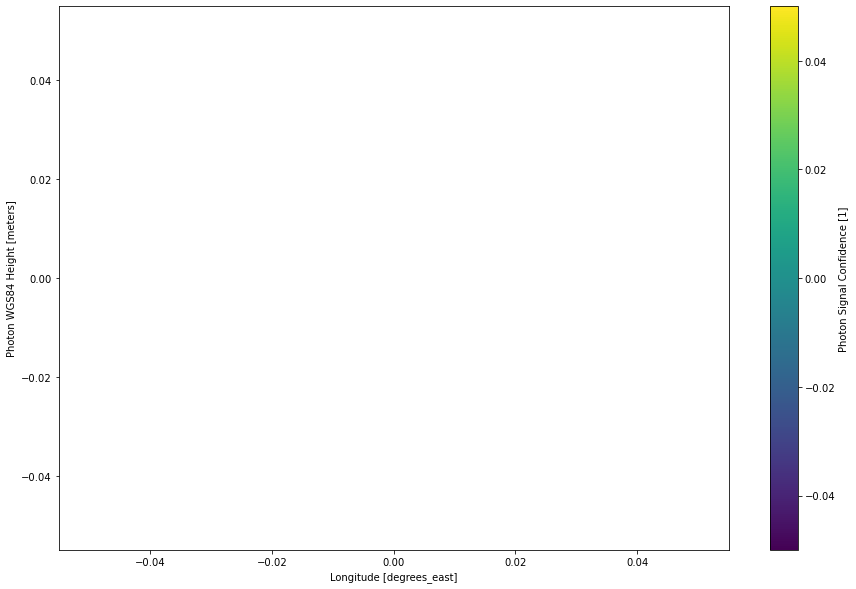

In [85]:
ds.where(ds.signal_conf_ph>2).where(ds.ds_surf_type==2).plot.scatter(x='lon_ph',y='h_ph',hue='signal_conf_ph',s=.2,size=10)